In [151]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings('ignore')

In [152]:
df=pd.read_csv("C:/Users/surendar.reddy/Documents/data Science projet_Data traine/DataTrained_Project_Week-1/Evaluation_Week1/baseball.csv")
pd.set_option('display.max_rows', None)
df.columns
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


# Some of the Abbrevationn got about baseball teams
yearID - Year
teamID - Team
franchID - Franchise (links to TeamsFranchise table)
G - Games played
W - Wins
LgWin - League Champion(Y or N)
WSWin - World Series Winner (Y or N)
R - Runs scored
AB - At bats
H - Hits by batters
HR - Homeruns by batters
BB - Walks by batters
SO - Strikeouts by batters
SB - Stolen bases
CS - Caught stealing
HBP - Batters hit by pitch
SF - Sacrifice flies
RA - Opponents runs scored
ER - Earned runs allowed
ERA - Earned run average
CG - Complete games
SHO - Shutouts
SV - Saves
IPOuts - Outs Pitched (innings pitched x 3)
HA - Hits allowed
HRA - Homeruns allowed
BBA - Walks allowed
SOA - Strikeouts by pitchers
E - Errors
DP - Double Plays
FP - Fielding percentage
name - Team’s full name

In [153]:
cols = ['Wins','Runs','At_bats','Hits','Doubles','Triples','Homeruns_allowed','Walks', 'Strikeouts','Stolen_bases','Opponents runs','Earned_runs_allowed','Earned_run_average','Caught_stealing','Shutouts','Saves_IPOuts-Outs_Pitched','Errors']

#refernce='[W', 'R',     'AB',    'H',   '2B',     '3B',         'HR',         'BB',       'SO',       'SB',             'RA',            'ER',                  'ERA',               'CG',         'SHO',        'SV',                      'E']

In [154]:
df.columns = cols
df

,Wins,Runs,At_bats,Hits,Doubles,Triples,Homeruns_allowed,Walks,Strikeouts,Stolen_bases,Opponents runs,Earned_runs_allowed,Earned_run_average,Caught_stealing,Shutouts,Saves_IPOuts-Outs_Pitched,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [155]:
df.shape

(30, 17)

In [156]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wins                       30 non-null     int64  
 1   Runs                       30 non-null     int64  
 2   At_bats                    30 non-null     int64  
 3   Hits                       30 non-null     int64  
 4   Doubles                    30 non-null     int64  
 5   Triples                    30 non-null     int64  
 6   Homeruns_allowed           30 non-null     int64  
 7   Walks                      30 non-null     int64  
 8   Strikeouts                 30 non-null     int64  
 9   Stolen_bases               30 non-null     int64  
 10  Opponents runs             30 non-null     int64  
 11  Earned_runs_allowed        30 non-null     int64  
 12  Earned_run_average         30 non-null     float64
 13  Caught_stealing            30 non-null     int64  
 

Wins                         0
Runs                         0
At_bats                      0
Hits                         0
Doubles                      0
Triples                      0
Homeruns_allowed             0
Walks                        0
Strikeouts                   0
Stolen_bases                 0
Opponents runs               0
Earned_runs_allowed          0
Earned_run_average           0
Caught_stealing              0
Shutouts                     0
Saves_IPOuts-Outs_Pitched    0
Errors                       0
dtype: int64

In [157]:
df.describe()

,Wins,Runs,At_bats,Hits,Doubles,Triples,Homeruns_allowed,Walks,Strikeouts,Stolen_bases,Opponents runs,Earned_runs_allowed,Earned_run_average,Caught_stealing,Shutouts,Saves_IPOuts-Outs_Pitched,Errors
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


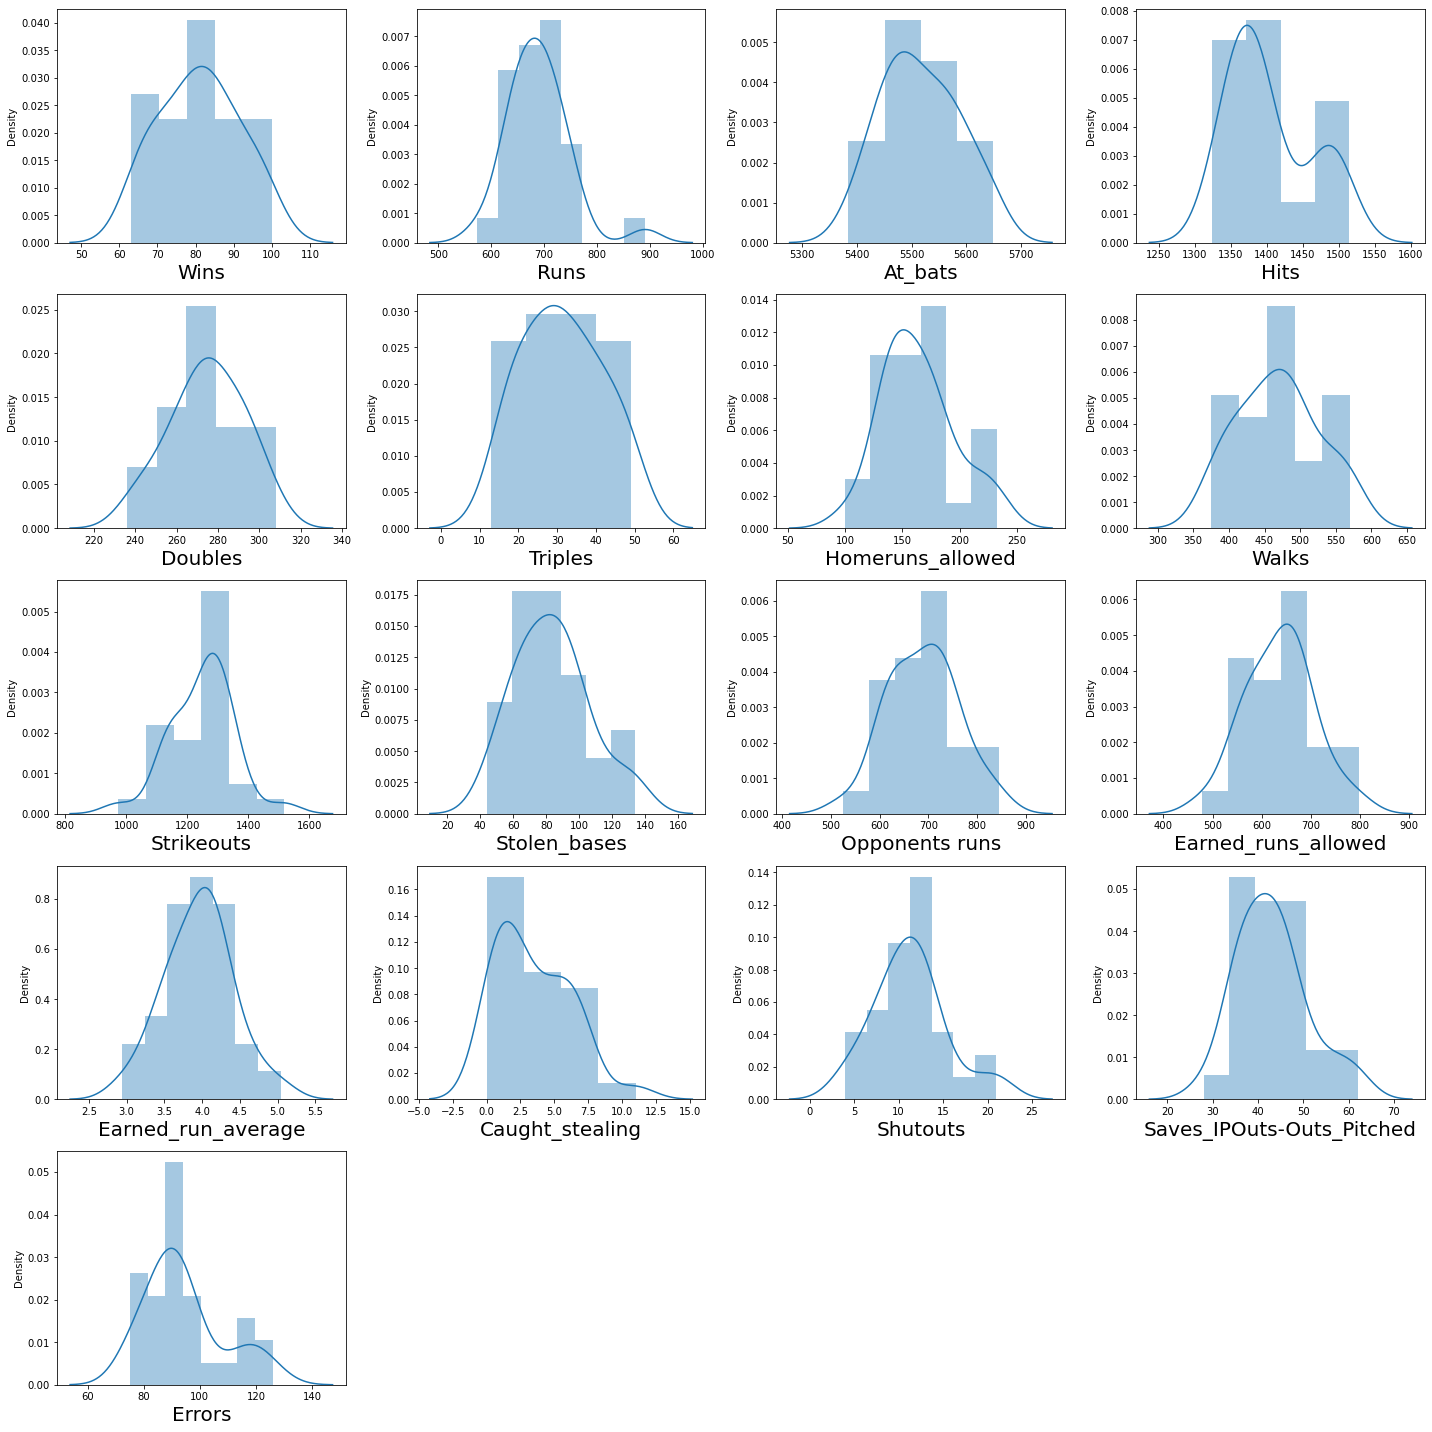

In [158]:
#Interpretattions from Mean and Std deviations the data looks okay from this tables, Seeing how there are distributed

plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()  

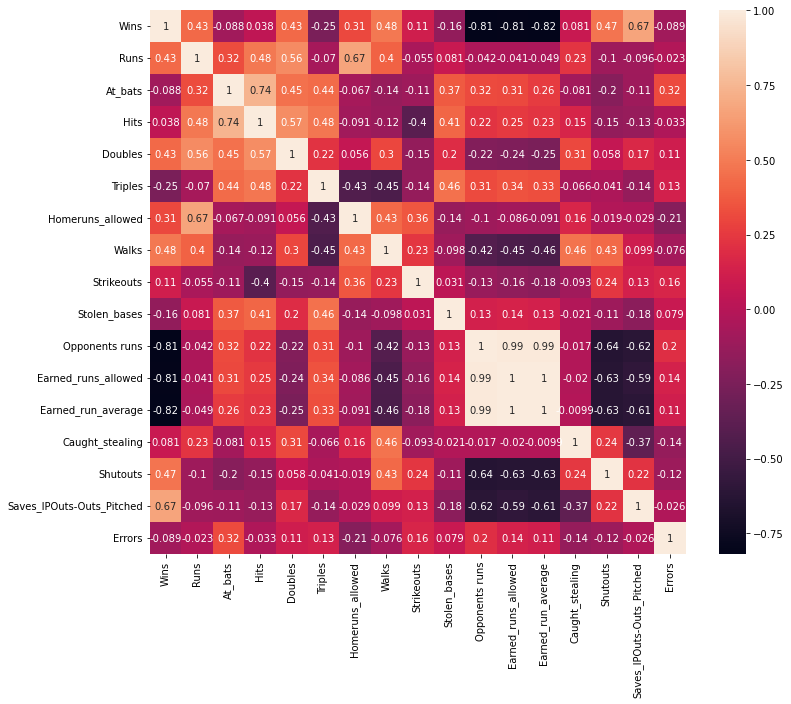

,Wins,Runs,At_bats,Hits,Doubles,Triples,Homeruns_allowed,Walks,Strikeouts,Stolen_bases,Opponents runs,Earned_runs_allowed,Earned_run_average,Caught_stealing,Shutouts,Saves_IPOuts-Outs_Pitched,Errors
Wins,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
Runs,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
At_bats,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
Hits,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
Doubles,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
Triples,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
Homeruns_allowed,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
Walks,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
Strikeouts,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
Stolen_bases,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


In [159]:
Corr=df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(Corr,annot=True)
plt.show()
Corr

# In Relaton to Label
#Wins Highly Negatively correlated to Oppunent runs, Earned rens allowed, Earned runs avarage
#Wins possitvily correlated to Saves_IPOuts-Outs_Pitched

# In Relaton to Features
#Homeruns alloed posssitivily correlated to Runs
#Saved Saves_IPOuts-Outs_Pitched negativily correlated to oppunent runs, Earned_run_average
#Earned_runs_allowed are highy possitivly correlated to Earned_run_average, Oppontent runs

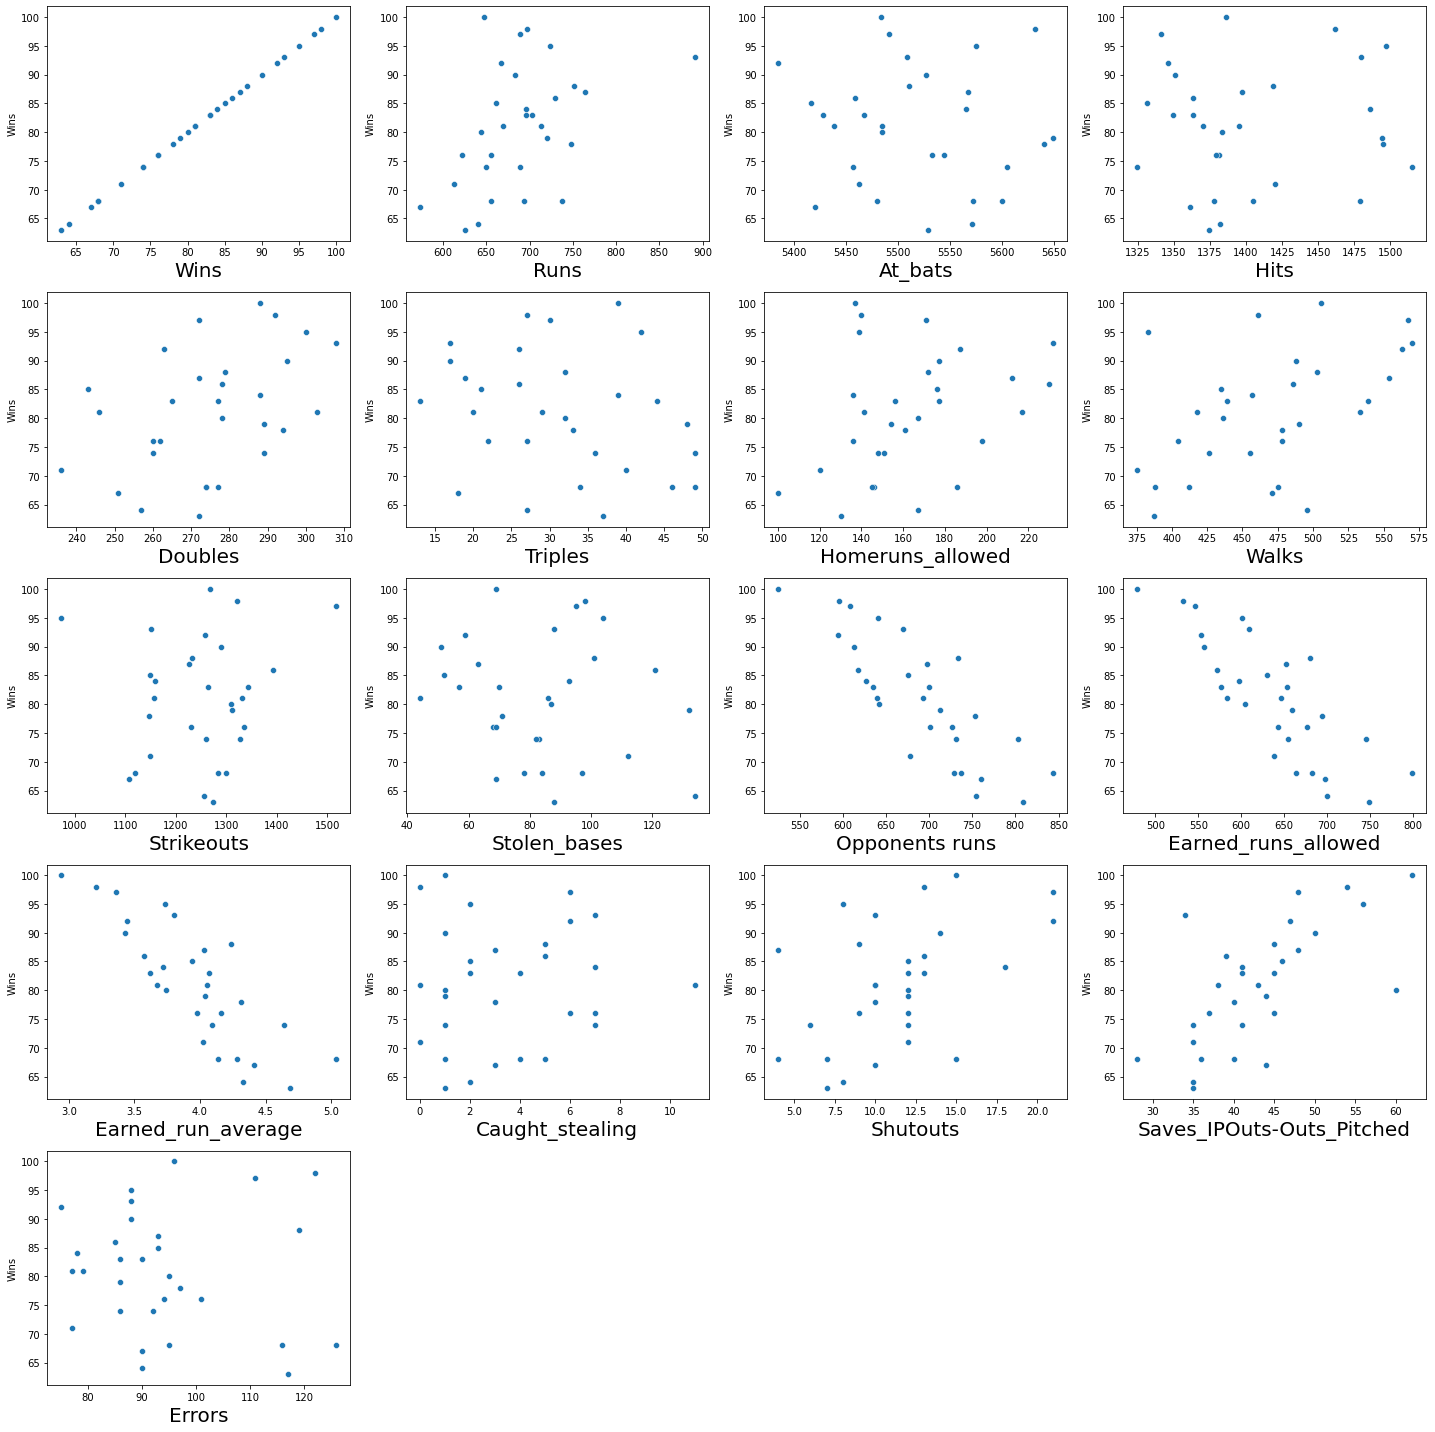

In [160]:
# to visualize the correlation between the variables and Label

plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.scatterplot(df[column],df['Wins'])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()  
# As per our assumption the garphs also give us the same information #Wins Highly Negatively correlated to Oppunent runs, Earned rens allowed, Earned runs avarage
#Wins possitvily correlated to Saves_IPOuts-Outs_Pitched

In [161]:
#Multicollinearity check
x=df.drop(columns=['Wins'],axis=1)
y=df['Wins']

In [162]:
x=df.drop(columns=['Wins'],axis=1).assign(const=1)

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns


vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
print(vif_data)


                      feature           VIF
0                        Runs     11.522370
1                     At_bats     13.311532
2                        Hits     10.070668
3                     Doubles      4.019297
4                     Triples      3.294146
5            Homeruns_allowed     10.079902
6                       Walks      3.806098
7                  Strikeouts      2.652401
8                Stolen_bases      2.102684
9              Opponents runs    191.839155
10        Earned_runs_allowed   1680.387145
11         Earned_run_average   1222.722240
12            Caught_stealing      3.059904
13                   Shutouts      3.654331
14  Saves_IPOuts-Outs_Pitched      5.798850
15                     Errors      2.186219
16                      const  58687.985233


In [163]:
#As expected, There are many features which are correlated So will use best 10 features by using SelectBest K
from sklearn.feature_selection import SelectKBest, f_classif
best_features=SelectKBest(score_func=f_classif, k=10)
fit=best_features.fit(x,y)
df_scores=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(x.columns)
feaures_scores=pd.concat([df_scores,df_columns], axis=1)
feaures_scores.columns=['Score','feature Name']
feaures_scores.sort_values(['Score'], ascending=False)

,Score,feature Name
0,4.325471,Runs
8,3.145176,Stolen_bases
14,2.966365,Saves_IPOuts-Outs_Pitched
9,2.420967,Opponents runs
15,2.403946,Errors
11,1.665038,Earned_run_average
10,1.574876,Earned_runs_allowed
1,1.552727,At_bats
7,1.509218,Strikeouts
13,1.204067,Shutouts


##Based on 2 values,( VIF and SelectBest k), will choose to remove some columns, High VIF, Low SelectBest K


In [164]:
#df1=x.drop(['Caught_stealing'],inplace=True,axis=1)
df1=x.drop(['Hits'],inplace=True,axis=1)
#df1=x.drop(['Triples'],inplace=True,axis=1)
#df1=x.drop(['Doubles'],inplace=True,axis=1)
df1=x.drop(['Homeruns_allowed'],inplace=True,axis=1)
#df1=x.drop(['Walks'],inplace=True,axis=1)
#df1=x.drop(['Shutouts'],inplace=True,axis=1)
#df1=x.drop(['Strikeouts'],inplace=True,axis=1)
df1=x.drop(['At_bats'],inplace=True,axis=1)
df1=x.drop(['Earned_runs_allowed'],inplace=True,axis=1)
df1=x.drop(['Earned_run_average'],inplace=True,axis=1)

In [165]:
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
print(vif_data)
#This shows there is more need to remove columns


                      feature          VIF
0                        Runs     2.004192
1                     Doubles     2.638408
2                     Triples     2.616806
3                       Walks     2.925053
4                  Strikeouts     1.293946
5                Stolen_bases     1.487904
6              Opponents runs     4.015194
7             Caught_stealing     2.124069
8                    Shutouts     2.955047
9   Saves_IPOuts-Outs_Pitched     2.655073
10                     Errors     1.195888
11                      const  1306.939000


In [166]:
df1=x.drop(['const'],inplace=True,axis=1)

In [167]:
#will use PCA for checking if that would be helpfull
#Will Check how much x features are related to features

In [168]:
#Checking Multicollinearilty
Corr=x.corr()
Corr
#Now I see very less correlation values between the features

,Runs,Doubles,Triples,Walks,Strikeouts,Stolen_bases,Opponents runs,Caught_stealing,Shutouts,Saves_IPOuts-Outs_Pitched,Errors
Runs,1.000000,0.560084,-0.070072,0.402452,-0.054726,0.081367,-0.041623,0.232042,-0.103274,-0.096380,-0.023262
Doubles,0.560084,1.000000,0.220490,0.302700,-0.150752,0.195027,-0.218160,0.306675,0.057998,0.171576,0.105754
Triples,-0.070072,0.220490,1.000000,-0.454949,-0.141196,0.457437,0.314125,-0.065898,-0.041396,-0.142370,0.126678
Walks,0.402452,0.302700,-0.454949,1.000000,0.233652,-0.098347,-0.416445,0.462478,0.426004,0.099445,-0.075685
Strikeouts,-0.054726,-0.150752,-0.141196,0.233652,1.000000,0.030968,-0.129745,-0.093418,0.237721,0.126297,0.155133
Stolen_bases,0.081367,0.195027,0.457437,-0.098347,0.030968,1.000000,0.132290,-0.020783,-0.106563,-0.183418,0.079149
Opponents runs,-0.041623,-0.218160,0.314125,-0.416445,-0.129745,0.132290,1.000000,-0.016659,-0.636862,-0.616224,0.198996
Caught_stealing,0.232042,0.306675,-0.065898,0.462478,-0.093418,-0.020783,-0.016659,1.000000,0.241676,-0.367766,-0.140047
Shutouts,-0.103274,0.057998,-0.041396,0.426004,0.237721,-0.106563,-0.636862,0.241676,1.000000,0.221639,-0.115716
Saves_IPOuts-Outs_Pitched,-0.096380,0.171576,-0.142370,0.099445,0.126297,-0.183418,-0.616224,-0.367766,0.221639,1.000000,-0.025636


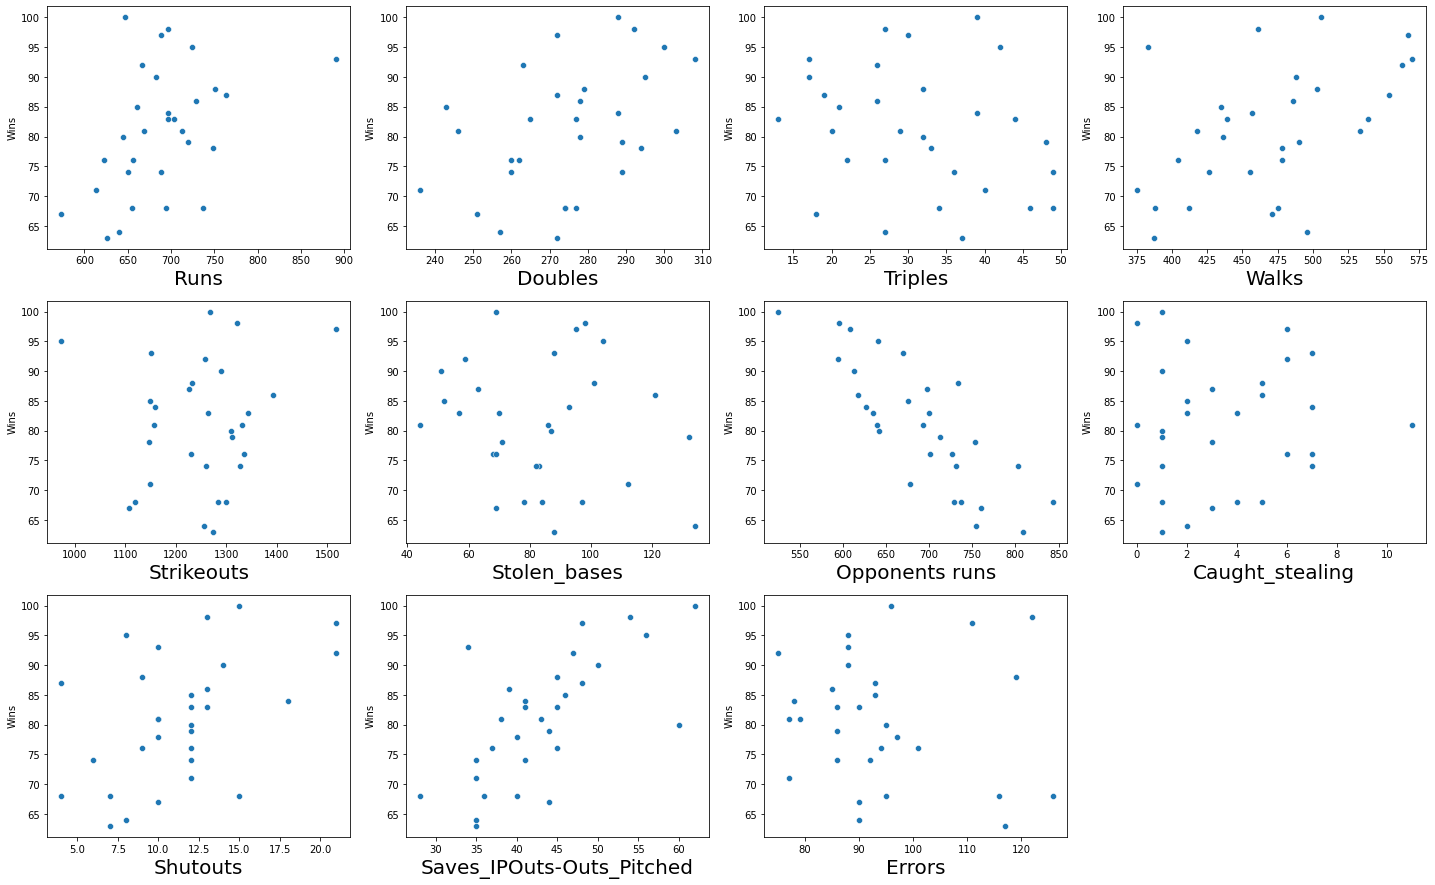

In [169]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for column in x:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.scatterplot(x[column],y)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()  

#Opponent Runs and Runs show more relations wih Y, Others are very less correlated

In [170]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled.shape

(30, 11)

In [171]:
#Train the data to the model
x_train, x_test, y_train, y_test=train_test_split(x_scaled,y,test_size=0.25, random_state=100)

In [172]:
from sklearn.ensemble import RandomForestRegressor
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train,sample_weight=100)
y_pred=RFR.predict(x_test)
RFR_accuracy=metrics.r2_score(y_test,y_pred)
print(RFR_accuracy)

0.36940049174569667


In [173]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
y_pred=y_pred.round(decimals=0)
reg_accuracy=metrics.r2_score(y_test,y_pred)
print(reg_accuracy)

0.7555321390937829


In [174]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor()
ada.fit(x_train,y_train)
y_pred=ada.predict(x_test)
ada_accuracy=metrics.r2_score(y_test,y_pred)
print(ada_accuracy)

0.30479143817695664


In [175]:
from sklearn.ensemble import GradientBoostingRegressor
gbdt_clf=GradientBoostingRegressor()
gbdt_clf.fit(x_train,y_train)
y_pred=gbdt_clf.predict(x_test)
gbdt_clf_accuracy=metrics.r2_score(y_test,y_pred)
gbdt_clf_accuracy

-0.20121804534605436

In [176]:
#Cross Validation for Linear Regression model
from sklearn.model_selection import KFold,cross_val_score
k_f=KFold(n_splits=5, shuffle=True)
k_f
x_scaled=pd.DataFrame(x_scaled,columns=x.columns)
from sklearn.metrics import accuracy_score
k=5
acc_score = []

for train_index , test_index in k_f.split(x_scaled):
    x_train , x_test = x_scaled.iloc[train_index,:],x_scaled.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
     
    reg.fit(x_train,y_train)
    pred_values = reg.predict(x_test)
     
    acc = metrics.r2_score(y_test,pred_values)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

accuracy of each fold - [0.729508131299683, 0.9363872987521173, 0.7102612726717416, 0.40186377494693737, 0.9037945317341531]
Avg accuracy : 0.7363630018809265


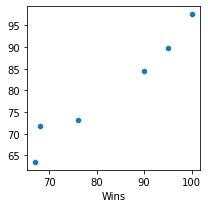

In [177]:
# Will go with Linear regression Model, Hyperyunning Not Applicable
plt.figure(figsize=(3,3),facecolor='white')
plotnumber=1
sns.scatterplot(y_test,pred_values)

plt.tight_layout()  

In [178]:
len(y_test)
y_pred

array([70.55703745, 82.3674869 , 69.24658739, 82.9835923 , 76.11657125,
       81.80060438, 78.76644478, 93.64752591])

In [179]:
with open("reg", "wb") as f:
    pickle.dump(reg, f)